In [25]:
import numpy as np 
import matplotlib.pyplot as plt
import os, pickle
import xarray as xr
from scipy import interpolate

In [26]:
os.environ['WK_DIR'] = '/localdrive/drive10/jj/mdtf/wkdir/MDTF_GFDL.EXP1.2PM.v7.001_2008_2012/etc_composites'
os.environ['OBS_DATA'] = '/localdrive/drive10/jj/mdtf/inputdata/obs_data/etc_composites'
os.environ['POD_HOME'] = '/localdrive/drive10/jj/mdtf/MDTF-diagnostics/diagnostics/etc_composites'
os.environ['CASENAME'] = 'MDTF_GFDL.EXP1.2PM.v7.001'

In [27]:
## Reading in the model composites
model_file = f"{os.environ['WK_DIR']}/tmp/RUNDIR/tmprun/read_tmprun/composites.pkl"
model_data = pickle.load(open(model_file, 'rb'))

In [28]:
# load in the netcdf files 
obs_file = f"{os.environ['OBS_DATA']}/modis_merra.nc"
era_file = f"{os.environ['OBS_DATA']}/era_interim.nc"

# reading in the observation file
ds = xr.open_dataset(obs_file)
obs_x = ds['X'].values
obs_y = ds['Y'].values
modis_cld = ds['modis_cld'].values
merra_prw = ds['merra_pw'].values
merra_w500 = ds['merra_omega'].values
ds.close()

# reading in the re-analysis file
ds = xr.open_dataset(era_file)
erai_x = ds['X'].values
erai_y = ds['Y'].values
tp_nh_ocean_warm = ds['tp_nh_ocean_warm'].values
prw_nh_ocean_warm = ds['prw_nh_ocean_warm'].values
uv10_nh_ocean_warm = ds['uv10_nh_ocean_warm'].values
w500_nh_ocean_warm = ds['w500_nh_ocean_warm'].values
tp_sh_ocean_warm = ds['tp_sh_ocean_warm'].values
prw_sh_ocean_warm = ds['prw_sh_ocean_warm'].values
uv10_sh_ocean_warm = ds['uv10_sh_ocean_warm'].values
w500_sh_ocean_warm = ds['w500_sh_ocean_warm'].values
ds.close()
# 
# Re-griding the observation data 
## setting up the necessary x,y values in the format required for griddata
obs_x_1d = obs_x.flatten()
obs_y_1d = obs_y.flatten()

modis_cld_1d = modis_cld.flatten()
merra_prw_1d = merra_prw.flatten()
merra_w500_1d = merra_w500.flatten()

## the erai x and y are 1d, have to convert it to a 2d grid
erai_x_grid, erai_y_grid = np.meshgrid(erai_x, erai_y)
erai_x_1d = erai_x_grid.flatten()
erai_y_1d = erai_y_grid.flatten()

# interpolating the ang, dist plots from observations on to the erai standard grid (same grid as the outputs from the model)
erai_modis_cld = interpolate.griddata((obs_x_1d, obs_y_1d), modis_cld_1d, (erai_x_1d, erai_y_1d))
erai_modis_cld = erai_modis_cld.reshape(erai_x_grid.shape)

erai_merra_prw = interpolate.griddata((obs_x_1d, obs_y_1d), merra_prw_1d, (erai_x_1d, erai_y_1d))
erai_merra_prw = erai_merra_prw.reshape(erai_x_grid.shape)

erai_merra_w500 = interpolate.griddata((obs_x_1d, obs_y_1d), merra_w500_1d, (erai_x_1d, erai_y_1d))
erai_merra_w500 = erai_merra_w500.reshape(erai_x_grid.shape)

/home/jj/anaconda3/envs/mcms/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/home/jj/anaconda3/envs/mcms/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide
/home/jj/anaconda3/envs/mcms/lib/python3.6/site-packages/ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in true_divide
/home/jj/anaconda3/envs/mcms/lib/python3.6/site-packages/ipykernel_launcher.py:88: RuntimeWarning: invalid value encountered in true_divide


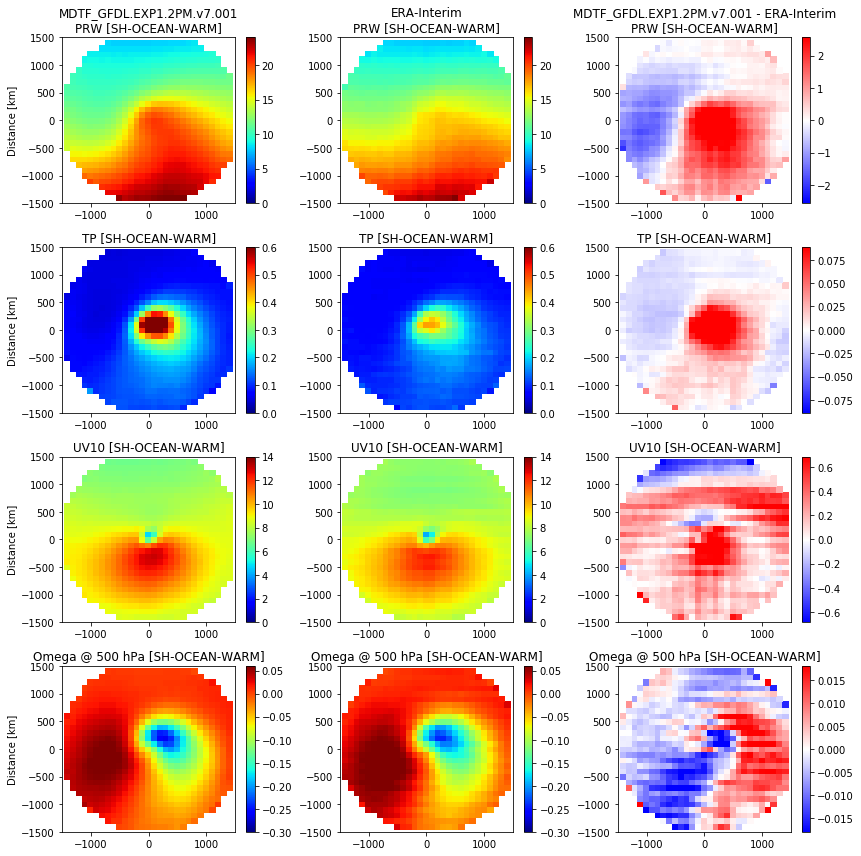

In [29]:
plt.figure(figsize=(12,12))

plt.subplot(4,3,1)
hemis = 'SH'; lo = 'ocean'; season = 'warm'; var = 'prw'
model_val = model_data[hemis][lo][season][var]['area_sum']/model_data[hemis][lo][season][var]['area_cnt']
plt.pcolormesh(erai_x, erai_y, model_val, cmap='jet', vmin=0, vmax=24)
plt.colorbar()
plt.title(f'{os.environ["CASENAME"]}\nPRW [SH-OCEAN-WARM]')
plt.ylabel('Distance [km]')
plt.ylim(-1500, 1500)
plt.xlim(-1500, 1500)

plt.subplot(4,3,2)
plt.pcolormesh(erai_x, erai_y, prw_sh_ocean_warm, cmap='jet', vmin=0, vmax=24)
plt.colorbar()
plt.title('ERA-Interim\nPRW [SH-OCEAN-WARM]')
plt.ylim(-1500, 1500)
plt.xlim(-1500, 1500)

plt.subplot(4,3,3)
diff_val = model_val - prw_sh_ocean_warm
vmax = np.nanpercentile(np.abs(diff_val).flatten(), 95)
vmin = -1*vmax
plt.pcolormesh(erai_x, erai_y, diff_val, vmin=vmin, vmax=vmax, cmap='bwr')
plt.colorbar()
plt.title(f'{os.environ["CASENAME"]} - ERA-Interim\nPRW [SH-OCEAN-WARM]')
plt.ylim(-1500, 1500)
plt.xlim(-1500, 1500)

plt.subplot(4,3,4)
hemis = 'SH'; lo = 'ocean'; season = 'warm'; var = 'tp'
model_val = model_data[hemis][lo][season][var]['area_sum']/model_data[hemis][lo][season][var]['area_cnt']
plt.pcolormesh(erai_x, erai_y, model_val, cmap='jet', vmin=0, vmax=.6)
# plt.pcolormesh(erai_x, erai_y, model_val, cmap='jet')
plt.colorbar()
plt.title(f'TP [SH-OCEAN-WARM]')
plt.ylabel('Distance [km]')
plt.ylim(-1500, 1500)
plt.xlim(-1500, 1500)

plt.subplot(4,3,5)
plt.pcolormesh(erai_x, erai_y, tp_sh_ocean_warm, cmap='jet', vmin=0, vmax=.6)
plt.colorbar()
plt.title('TP [SH-OCEAN-WARM]')
plt.ylim(-1500, 1500)
plt.xlim(-1500, 1500)

plt.subplot(4,3,6)
diff_val = model_val - tp_sh_ocean_warm
vmax = np.nanpercentile(np.abs(diff_val).flatten(), 95)
vmin = -1*vmax
plt.pcolormesh(erai_x, erai_y, diff_val, vmin=vmin, vmax=vmax, cmap='bwr')
plt.colorbar()
plt.title(f'TP [SH-OCEAN-WARM]')
plt.ylim(-1500, 1500)
plt.xlim(-1500, 1500)

plt.subplot(4,3,7)
hemis = 'SH'; lo = 'ocean'; season = 'warm'; var = 'uv10'
model_val = model_data[hemis][lo][season][var]['area_sum']/model_data[hemis][lo][season][var]['area_cnt']
plt.pcolormesh(erai_x, erai_y, model_val, cmap='jet', vmin=0, vmax=14)
# plt.pcolormesh(erai_x, erai_y, model_val, cmap='jet')
plt.colorbar()
plt.title(f'UV10 [SH-OCEAN-WARM]')
plt.ylabel('Distance [km]')
plt.ylim(-1500, 1500)
plt.xlim(-1500, 1500)

plt.subplot(4,3,8)
plt.pcolormesh(erai_x, erai_y, uv10_sh_ocean_warm, cmap='jet', vmin=0, vmax=14)
plt.colorbar()
plt.title('UV10 [SH-OCEAN-WARM]')
plt.ylim(-1500, 1500)
plt.xlim(-1500, 1500)

plt.subplot(4,3,9)
diff_val = model_val - uv10_sh_ocean_warm
vmax = np.nanpercentile(np.abs(diff_val).flatten(), 95)
vmin = -1*vmax
plt.pcolormesh(erai_x, erai_y, diff_val, vmin=vmin, vmax=vmax, cmap='bwr')
plt.colorbar()
plt.title(f'UV10 [SH-OCEAN-WARM]')
plt.ylim(-1500, 1500)
plt.xlim(-1500, 1500)

plt.subplot(4,3,10)
hemis = 'SH'; lo = 'ocean'; season = 'warm'; var = 'w500'
model_val = model_data[hemis][lo][season][var]['area_sum']/model_data[hemis][lo][season][var]['area_cnt']
plt.pcolormesh(erai_x, erai_y, model_val, cmap='jet', vmin=-.3, vmax=.06)
# plt.pcolormesh(erai_x, erai_y, model_val, cmap='jet')
plt.colorbar()
plt.title(f'Omega @ 500 hPa [SH-OCEAN-WARM]')
plt.ylabel('Distance [km]')
plt.ylim(-1500, 1500)
plt.xlim(-1500, 1500)

plt.subplot(4,3,11)
plt.pcolormesh(erai_x, erai_y, w500_sh_ocean_warm, cmap='jet', vmin=-.3, vmax=.06)
plt.colorbar()
plt.title('Omega @ 500 hPa [SH-OCEAN-WARM]')
plt.ylim(-1500, 1500)
plt.xlim(-1500, 1500)

plt.subplot(4,3,12)
diff_val = model_val - w500_sh_ocean_warm
vmax = np.nanpercentile(np.abs(diff_val).flatten(), 95)
vmin = -1*vmax
plt.pcolormesh(erai_x, erai_y, diff_val, vmin=vmin, vmax=vmax, cmap='bwr')
plt.colorbar()
plt.title(f'Omega @ 500 hPa [SH-OCEAN-WARM]')
plt.ylim(-1500, 1500)
plt.xlim(-1500, 1500)

plt.tight_layout()
out_file = f"{os.environ['WK_DIR']}/model/diff_{os.environ['CASENAME']}_erai_vars_SH_ocean_WARM.png"
plt.savefig(out_file)
plt.show()
# plt.close('all')


In [30]:
plt.figure(figsize=(12,6))

plt.subplot(2,3,1)
hemis = 'SH'; lo = 'ocean'; season = 'warm'; var = 'prw'
model_val = model_data[hemis][lo][season][var]['area_sum']/model_data[hemis][lo][season][var]['area_cnt']
plt.pcolormesh(erai_x, erai_y, model_val, cmap='jet', vmin=0, vmax=24)
plt.colorbar()
plt.title(f'{os.environ["CASENAME"]}\nPRW [SH-OCEAN-WARM]')
plt.ylabel('Distance [km]')
plt.ylim(-1500, 1500)
plt.xlim(-1500, 1500)

plt.subplot(2,3,2)
tmp = erai_merra_prw.copy()
tmp[np.isnan(model_val)] = np.nan
plt.pcolormesh(erai_x, erai_y, tmp, cmap='jet', vmin=0, vmax=24)
plt.colorbar()
plt.title('ERA-Interim\nPRW [SH-OCEAN-WARM]')
plt.ylim(-1500, 1500)
plt.xlim(-1500, 1500)

plt.subplot(2,3,3)
diff_val = model_val - erai_merra_prw
vmax = np.nanpercentile(np.abs(diff_val).flatten(), 95)
vmin = -1*vmax
plt.pcolormesh(erai_x, erai_y, diff_val, vmin=vmin, vmax=vmax, cmap='bwr')
plt.colorbar()
plt.title(f'{os.environ["CASENAME"]} - ERA-Interim\nPRW [SH-OCEAN-WARM]')
plt.ylim(-1500, 1500)
plt.xlim(-1500, 1500)

plt.subplot(2,3,4)
hemis = 'SH'; lo = 'ocean'; season = 'warm'; var = 'w500'
model_val = model_data[hemis][lo][season][var]['area_sum']/model_data[hemis][lo][season][var]['area_cnt']
plt.pcolormesh(erai_x, erai_y, model_val, cmap='jet', vmin=-.3, vmax=.06)
# plt.pcolormesh(erai_x, erai_y, model_val, cmap='jet')
plt.colorbar()
plt.title(f'Omega @ 500 hPa [SH-OCEAN-WARM]')
plt.ylabel('Distance [km]')
plt.ylim(-1500, 1500)
plt.xlim(-1500, 1500)

plt.subplot(2,3,5)
tmp = (erai_merra_w500.copy())
tmp[np.isnan(model_val)] = np.nan
# plt.pcolormesh(erai_x, erai_y, tmp, cmap='jet', vmin=-.3, vmax=.06)
plt.pcolormesh(erai_x, erai_y, tmp, cmap='jet')
plt.colorbar()
plt.title(f'Omega @ 500 hPa [SH-OCEAN-WARM]')
plt.ylim(-1500, 1500)
plt.xlim(-1500, 1500)

plt.subplot(2,3,6)
diff_val = model_val - erai_merra_w500
vmax = np.nanpercentile(np.abs(diff_val).flatten(), 95)
vmin = -1*vmax
plt.pcolormesh(erai_x, erai_y, diff_val, vmin=vmin, vmax=vmax, cmap='bwr')
plt.colorbar()
plt.title(f'Omega @ 500 hPa [SH-OCEAN-WARM]')
plt.ylim(-1500, 1500)
plt.xlim(-1500, 1500)

plt.tight_layout()
out_file = f"{os.environ['WK_DIR']}/model/diff_{os.environ['CASENAME']}_merra_vars_SH_ocean_WARM.png"
plt.savefig(out_file)
plt.close('all')



/home/jj/anaconda3/envs/mcms/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/home/jj/anaconda3/envs/mcms/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide


/home/jj/anaconda3/envs/mcms/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


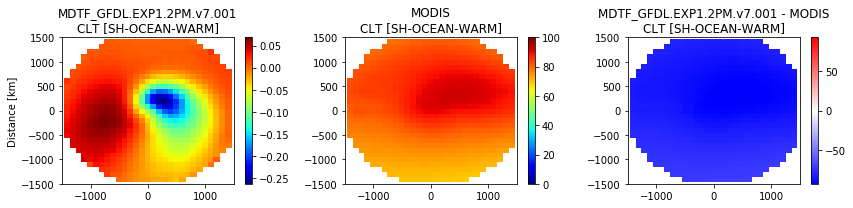

In [31]:
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
hemis = 'SH'; lo = 'ocean'; season = 'warm'; var = 'clt'
model_val = model_data[hemis][lo][season][var]['area_sum']/model_data[hemis][lo][season][var]['area_cnt']
plt.pcolormesh(erai_x, erai_y, model_val, cmap='jet')
# plt.pcolormesh(erai_x, erai_y, model_val, cmap='jet', vmin=0, vmax=100)
plt.colorbar()
plt.title(f'{os.environ["CASENAME"]}\nCLT [SH-OCEAN-WARM]')
plt.ylabel('Distance [km]')
plt.ylim(-1500, 1500)
plt.xlim(-1500, 1500)

plt.subplot(1,3,2)
tmp = erai_modis_cld.copy()
tmp[np.isnan(model_val)] = np.nan
plt.pcolormesh(erai_x, erai_y, tmp, cmap='jet', vmin=0, vmax=100)
plt.colorbar()
plt.title('MODIS\nCLT [SH-OCEAN-WARM]')
plt.ylim(-1500, 1500)
plt.xlim(-1500, 1500)

plt.subplot(1,3,3)
diff_val = model_val - erai_modis_cld
vmax = np.nanpercentile(np.abs(diff_val).flatten(), 95)
vmin = -1*vmax
plt.pcolormesh(erai_x, erai_y, diff_val, vmin=vmin, vmax=vmax, cmap='bwr')
plt.colorbar()
plt.title(f'{os.environ["CASENAME"]} - MODIS\nCLT [SH-OCEAN-WARM]')
plt.ylim(-1500, 1500)
plt.xlim(-1500, 1500)

plt.tight_layout()
# out_file = f"{os.environ['WK_DIR']}/model/diff_{os.environ['CASENAME']}_modis_vars_SH_ocean_WARM.png"
plt.savefig(out_file)
plt.show()
plt.close('all')



In [42]:
# file = '/localdrive/drive10/jj/mdtf/inputdata/model/GFDL.EXP1.2PM.001/6hr/GFDL.EXP1.2PM.001.CLT.6hr.nc'
file = '/localdrive/drive10/jj/mdtf/wkdir/MDTF_GFDL.EXP1.2PM.v7.001_2008_2012/etc_composites/tmp/data_converts/clt.2008.nc'
ds = xr.open_dataset(file)

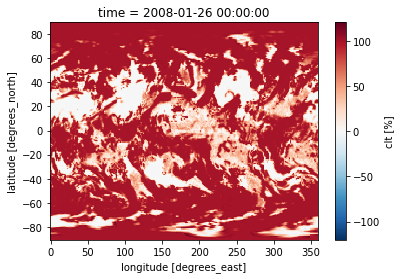

In [43]:
ds.clt.isel(time=100).plot()